# Creating smooth spatial fields

In [1]:
using CartesianGrids

┌ Info: Precompiling CartesianGrids [3e975e5d-2cf8-4263-9573-8460aaf534d9]
└ @ Base loading.jl:1260


In [13]:
using Plots

In [14]:
f = Gaussian(0.2,0,1)

Gaussian(0.2, 0, 1, 2.8209479177387813)

In [15]:
f(0.2)

1.0377687435514866

In [16]:
σ = rand()

0.18467059111211603

In [17]:
onegauss = SpatialGaussian(σ,σ,0.0,0.5,1)

SpatialGaussian(Gaussian(0.18467059111211603, 0.0, 1, 3.0551133244883), Gaussian(0.18467059111211603, 0.5, 1, 3.0551133244883), 1)

In [18]:
onegauss(σ,0.5)

3.4336827505325687

In [19]:
onegauss(rand(2)...)

0.020652964492947158

In [20]:
field = EmptySpatialField()
for x in [-0.5,0,0.5], y in [-0.5,0,0.5]
  field += SpatialGaussian(0.2,0.5,x,y,1)
end

In [21]:
field(0.5,0)

5.5357580598289235

In [22]:
field2 = -field;

In [23]:
field2(0.5,0)

-5.5357580598289235

In [24]:
gr = PhysicalGrid((-3.0,3.0),(-2.0,2.0),0.03)

PhysicalGrid{2}((208, 140), (104, 70), 0.03, ((-3.09, 3.09), (-2.07, 2.07)))

In [25]:
w = Nodes(Dual,size(gr));
xg, yg = coordinates(w,gr)

(-3.105:0.03:3.105, -2.085:0.03:2.085)

In [26]:
@time gfield = GeneratedField(w,field,gr);

  1.320544 seconds (7.95 M allocations: 263.804 MiB, 7.42% gc time)


In [27]:
datatype(gfield)

Nodes{Dual,208,140,Float64,Array{Float64,2}}

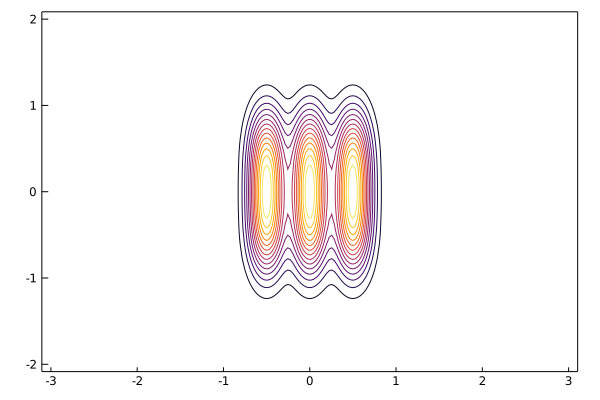

In [28]:
plot(gfield)

In [29]:
q = Edges(Primal,w);
xu, yu, xv, yv = coordinates(q,gr);

In [30]:
@time qfield = GeneratedField(q,field,onegauss,gr);

  0.899175 seconds (5.89 M allocations: 175.655 MiB, 4.88% gc time)


In [31]:
@time q .= qfield();

  0.093804 seconds (230.30 k allocations: 11.775 MiB)


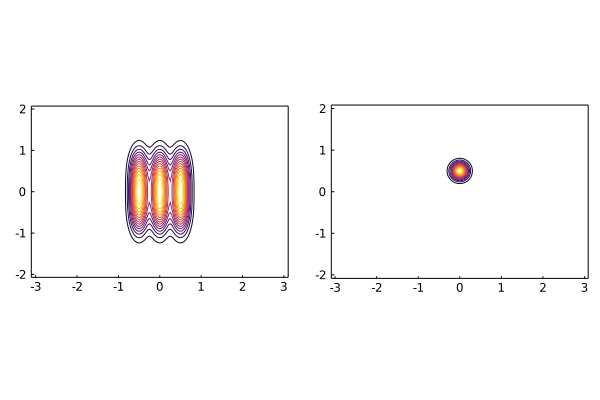

In [32]:
plot(
    plot(xu,yu,q.u),
    plot(xv,yv,q.v)
    )

In [33]:
tfield = GeneratedField(EdgeGradient(Dual,q),[field,SpatialGaussian(0.5,0,0,1),EmptySpatialField(),EmptySpatialField()],gr);

In [34]:
maximum(tfield().dudy)

1.2732395447351625

In [35]:
ffield = PulseField(tfield,0.5,0.1);
xux, yux = coordinates(tfield().dudx,gr)
xuy, yuy = coordinates(tfield().dudy,gr)

(-3.09:0.03:3.09, -2.07:0.03:2.07)

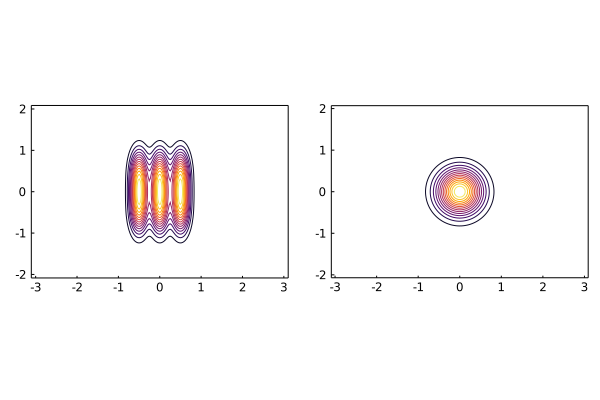

In [37]:
plot(
    plot(xux,yux,ffield(0.5).dudx),
    plot(xuy,yuy,ffield(0.5).dudy)
    )